In [1]:
import pandas as pd
import numpy as np
import os, sys
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


We are performing a Supervised learning which involves modeling the relationship between recorded values of  features and their corresponding labels ; Once this model is determined, it can be used to do inference on new recorded values of features to assciate them with one of the labels. It is further a classification task where the labels are discrete.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
default_dir = '/content/drive/MyDrive/icr-identify-age-related-conditions'
# default_dir = 'icr-identify-age-related-conditions'

train.csv - The training set.

*   Id Unique identifier for each observation.
*   AB-GL 56 anonymized health characteristics. All are numeric except  for EJ, which is categorical.
*   Class A binary target: 1 indicates the subject has been diagnosed with one of the three conditions
*   0 indicates they have not.



# Reading the training data
Rows = 617
Features = 58

In [ ]:
train_df = pd.read_csv('train.csv')


In [ ]:
#train_df = pd.read_csv(os.path.join(default_dir,'train.csv'))

print(f'Training Data Shape: {train_df.shape}')

train_df.head()

# Investigating missing values per column and imputing them accordingly.

In [ ]:
missing_values_sum = train_df.isnull().sum()

# Plotting the sum of missing values
plt.figure(figsize=(15, 6))
plt.bar(missing_values_sum.index, missing_values_sum.values)
plt.xlabel('Columns')
plt.ylabel('Sum of Missing Values')
plt.title('Sum of Missing Values in Each Column')
plt.xticks(rotation=45)
plt.show()

#Utility function to calculate statistical properties of columns grouped by class and irrespective of the class respectively.

In [ ]:
def calc_stats(df,column):
    # Calculate the median value of column
    median = df[column].median()
    print("median \t ",median)

    # Calculate the median value of  column grouped by 'Class'
    median_by_class = df.groupby('Class')[column].median()
    print("median_by_class \t ",median_by_class)

    # Calculate the mean value of  column
    mean = df[column].mean()
    print("mean \t",mean)

    # Calculate the mean value of column grouped by 'Class'
    mean_by_class = df.groupby('Class')[column].mean()
    print("mean_by_class \t",mean_by_class)

    return median,median_by_class,mean,mean_by_class


# Column BQ

In [ ]:
_= calc_stats(train_df,'BQ')

In [ ]:
# Find rows with missing data in 'BQ'
missing_rows = train_df[train_df['BQ'].isnull()]

missing_rows["Class"].value_counts()

In [ ]:
#It makes sense to choose the BQ_median_by_class 0 to use as imputed value.
train_df = train_df.fillna(value={'BQ': 53.775015})

# Lets investigate the other missing data

In [ ]:
missing_values_sum = train_df.isnull().sum()

# Plotting the sum of missing values
plt.figure(figsize=(15, 6))
plt.bar(missing_values_sum.index, missing_values_sum.values)
plt.xlabel('Columns')
plt.ylabel('Sum of Missing Values')
plt.title('Sum of Missing Values in Each Column')
plt.xticks(rotation=45)
plt.show()

# Column EL

In [ ]:
_= calc_stats(train_df,'EL')

In [ ]:
# Find rows with missing data in 'EL'
missing_rows = train_df[train_df['EL'].isnull()]

missing_rows["Class"].value_counts()

In [ ]:
# Define the median value of EL grouped by class to fill for each missing values based on their class.
fill_values = {
    0 : 68.992209,
    1 : 109.125159
}

In [ ]:
# Fill missing values in 'EL' column based on 'Class'
train_df['EL'] = train_df.apply(lambda row: fill_values[row['Class']] if pd.isnull(row['EL']) else row['EL'], axis=1)


In [ ]:
missing_values_sum = train_df.isnull().sum()
# Plotting the sum of missing values
plt.figure(figsize=(15, 6))
plt.bar(missing_values_sum.index, missing_values_sum.values)
plt.xlabel('Columns')
plt.ylabel('Sum of Missing Values')
plt.title('Sum of Missing Values in Each Column')
plt.xticks(rotation=45)
plt.show()

# Column CB

In [ ]:
_= calc_stats(train_df,'CB')

In [ ]:
# Find rows with missing data in 'CB'
missing_rows = train_df[train_df['CB'].isnull()]

missing_rows["Class"].value_counts()

In [ ]:
#It makes sense to choose the CB_median_by_class 0 to use as imputed value.
train_df = train_df.fillna(value={'CB': 42.802487})

# Column CC

In [ ]:
_= calc_stats(train_df,'CC')

In [ ]:
# Find rows with missing data in 'CC'
missing_rows = train_df[train_df['CC'].isnull()]

missing_rows["Class"].value_counts()

In [ ]:
# Define the value to fill for each class
fill_values = {
    0 : 0.670100,
    1 : 0.579919
}

In [ ]:
# Fill missing values in 'CC' column based on 'Class'
train_df['CC'] = train_df.apply(lambda row: fill_values[row['Class']] if pd.isnull(row['CC']) else row['CC'], axis=1)


# Column DU

In [ ]:
_= calc_stats(train_df,'DU')

In [ ]:
# Find rows with missing data in 'DU'
missing_rows = train_df[train_df['DU'].isnull()]

missing_rows["Class"].value_counts()

In [ ]:
#It makes sense to choose the DU_median_by_class 0 to use as imputed value.
train_df = train_df.fillna(value={'DU': 0.162079})

# FC

In [ ]:
_= calc_stats(train_df,'FC')

In [ ]:
# Find rows with missing data in 'FC'
missing_rows = train_df[train_df['FC'].isnull()]

missing_rows["Class"].value_counts()

In [ ]:
#It makes sense to choose the FC_median_by_class 1 to use as imputed value.
train_df = train_df.fillna(value={'FC': 34.734672})

# FL

In [ ]:
_= calc_stats(train_df,'FL')

In [ ]:
# Find rows with missing data in 'FL'
missing_rows = train_df[train_df['FL'].isnull()]

missing_rows["Class"].value_counts()

In [ ]:
#It makes sense to choose the FL_median_by_class 0 to use as imputed value.
train_df = train_df.fillna(value={'FL': 2.463620})

# FS

In [ ]:
_= calc_stats(train_df,'FS')

In [ ]:
# Find rows with missing data in 'FS'
missing_rows = train_df[train_df['FS'].isnull()]

missing_rows["Class"].value_counts()

In [ ]:
# Define the value to fill for each class
fill_values = {
    0 : 0.250601,
    1 : 0.257374
}

In [ ]:
train_df['FS'] = train_df.apply(lambda row: fill_values[row['Class']] if pd.isnull(row['FS']) else row['FS'], axis=1)



# GL

In [ ]:
_= calc_stats(train_df,'GL')

In [ ]:
# Find rows with missing data in 'GL'
missing_rows = train_df[train_df['GL'].isnull()]

missing_rows["Class"].value_counts()

In [ ]:
train_df = train_df.fillna(value={'GL': 0.435421})

With that, the missing values are imputed accordingly.

In [ ]:
missing_values_sum = train_df.isnull().sum()
# Plotting the sum of missing values
plt.figure(figsize=(15, 6))
plt.bar(missing_values_sum.index, missing_values_sum.values)
plt.xlabel('Columns')
plt.ylabel('Sum of Missing Values')
plt.title('Sum of Missing Values in Each Column')
plt.xticks(rotation=45)
plt.show()

Dropping the "Id" column

In [ ]:
train_df.drop("Id",axis=1,inplace=True)

In [ ]:
train_df.shape

"EJ" is categorical. Generating dummies and concatenating the same to the original dataframe and removing the categorical feature.

In [ ]:
train_df['EJ'].unique()

In [ ]:
# Convert int values to categorical features
converted_df = pd.get_dummies(train_df['EJ'], prefix='feature')

# Concatenate the converted features with the original DataFrame
train_df = pd.concat([train_df, converted_df], axis=1)

In [ ]:
train_df.drop("EJ",axis=1,inplace=True)

Rows= 617
Features = 57

In [ ]:
train_df.shape

In [ ]:
df=train_df

# Lets check the class distribution . The data collected is highly imbalanced , roughly 1:5

In [ ]:
class_distribution = df['Class'].value_counts()
class_distribution

# To avoid Redundancy , Overfitting and Instability , lets check the features highly correlated to each other , and get them removed for better interpretation.

In [ ]:
# Separate Class feature temporarily
target_temp = df['Class']
feature_matrix = df.drop(columns = ['Class'])

In [ ]:
# Threshold for removing correlated variables (without Class)
threshold = 0.8

# Calculate correlation matrix
corr_matrix = feature_matrix.corr(numeric_only=True)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Select columns with correlations above threshold
collinear_features = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d features to remove.' % (len(collinear_features)))

In [ ]:
#Remove correlated features
feature_matrix = feature_matrix[[col for col in feature_matrix.columns if col not in collinear_features]]

# Scaling the features to bring all the features in the range 0-1 . Algorithms converge faster when features are scaled. When the features have vastly different scales, the optimization process can become skewed and take longer to converge to the optimal solution.

In [ ]:
# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(feature_matrix)
train = scaler.transform(feature_matrix)

# Feature names
features = list(feature_matrix.columns)
feature_matrix = pd.DataFrame(data=train, columns=features)

#and the response feature (Class) is reattached.
feature_matrix['Class'] = target_temp



In [ ]:
feature_matrix.shape

In [ ]:
feature_matrix.head()

In [ ]:
feature_matrix.to_csv("Dataset1_scaled_Raw Features_Imbalanced.csv")

Splitting the Dataset into training and test dataset.

In [ ]:
#splitting application_train_newdf into train and test
train,test = train_test_split(feature_matrix,test_size=.20,random_state = 123)

#separating dependent and independent variables (no under/over sampling)
train_X = train[[i for i in train.columns if i not in ['Class']]]
train_Y = train[["Class"]].astype(int)

test_X  = test[[i for i in test.columns if i not in ['Class']]]
test_Y  = test[["Class"]].astype(int)

In [ ]:
train.shape

In [ ]:
count = train['Class'].value_counts()
count

In [ ]:
test.shape

In [ ]:
count = test['Class'].value_counts()
count

# Class imbalance in training dataset. We have to loop through the dataset and try different random subsets for a better score.

In [ ]:
# Down-sample Majority Class

count = train['Class'].value_counts()
num_majority = count[0]
num_minority = count[1]

print("num_majority ",num_majority)
print("num_minority ",num_minority)

#separating majority and minority classes
df_majority = train[train["Class"] == 0]
df_minority = train[train["Class"] == 1]

df_majority_undersampled = resample(df_majority, replace=False,
                                   n_samples=num_minority,
                                   random_state=123)

df_undersampled = pd.concat([df_minority,df_majority_undersampled],axis=0)
df_undersampled["Class"] = df_undersampled["Class"].astype(int)

#splitting dependent and independent variables

df_undersampled_X = df_undersampled[[i for i in df_undersampled.columns if i not in ['Class']]]
df_undersampled_Y = df_undersampled[["Class"]].astype(int)



In [ ]:
# Post Downsampling, 87+87 = 174
df_undersampled_X.shape

In [ ]:
df_undersampled_Y.shape

# Saving the balanced training data

In [ ]:
# Create a new DataFrame with the added column
Train_data_raw_features = df_undersampled_X.copy()

# Attaching 'Class'
Train_data_raw_features['Class'] = df_undersampled[["Class"]].astype(int)


# Save the new DataFrame to a CSV file
Train_data_raw_features.to_csv('Balanced_Train_data_raw_features.csv', index=False)

# Print the new DataFrame
Train_data_raw_features.head()

In [ ]:
Train_data_raw_features["Class"].value_counts()

In [ ]:
Train_data_raw_features.shape

# Saving the unbalanced test data

In [ ]:
test.shape

In [ ]:
test.head()

In [ ]:
test["Class"].value_counts()

In [ ]:
test.to_csv('Unbalanced_Test_data_raw_features.csv', index=False)

# We could begin our training now with just the cleaned dataset with original features. Trying Gardient boosting machines

# Due to low volume of data, trying Cross Validation training with 5 folds

In [ ]:
clf = GradientBoostingClassifier(n_estimators=1000,
                 learning_rate=0.01,
                 max_depth=3,
                 random_state=42,loss='log_loss')

scores = cross_validate(clf, df_undersampled_X,np.array(df_undersampled_Y['Class']), cv=5, return_estimator=True)
print(scores)


#Using the fold 1 estimator as it had the highest accuracy out of 5 splits.

The balanced_accuracy_score function computes the balanced accuracy, which avoids inflated performance estimates on imbalanced datasets. It is the macro-average of recall scores per class or, equivalently, raw accuracy where each sample is weighted according to the inverse prevalence of its true class. Thus for balanced datasets, the score is equal to accuracy.

In the binary case, balanced accuracy is equal to the arithmetic mean of sensitivity (true positive rate) and specificity (true negative rate), or the area under the ROC curve with binary predictions rather than scores:




balanced-accuracy = 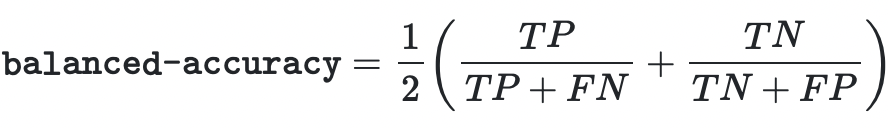

If the classifier performs equally well on either class, this term reduces to the conventional accuracy (i.e., the number of correct predictions divided by the total number of predictions).

In contrast, if the conventional accuracy is above chance only because the classifier takes advantage of an imbalanced test set, then the balanced accuracy, as appropriate, will drop to 1/n_classes.

In [ ]:
clf = scores['estimator'][0]
clf.fit(df_undersampled_X,np.array(df_undersampled_Y['Class']))
y_pred_gb= clf.predict(test_X)
accuracy = balanced_accuracy_score(test_Y, y_pred_gb)
print("balanced_accuracy_score ",accuracy)
cm = confusion_matrix(test_Y, y_pred_gb, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()


In [ ]:
target_names = ['class 0', 'class 1']
print(classification_report(test_Y, y_pred_gb, target_names=target_names))

# Can we do better ?

Using PCA with 2 and 3 components for visualization

In [ ]:
pca = PCA(n_components=2,whiten=True)
pca.fit(df_undersampled_X)
X_2D=pca.transform(df_undersampled_X)

In [ ]:
df_undersampled['PCA1'] = X_2D[:, 0]
df_undersampled['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='Class', data=df_undersampled, fit_reg=False);

We see that in the two-dimensional representation, the clusters are not well separated.

In [ ]:
pca_2=PCA(n_components=3)
pca_2.fit(df_undersampled_X)
X_3D=pca_2.transform(df_undersampled_X)

In [ ]:
a = X_3D[:, 0]
b = X_3D[:, 1]
d = X_3D[:, 2]

In [ ]:
from mpl_toolkits import mplot3d
from matplotlib.colors import ListedColormap
mycmap = ListedColormap(["blue", "red"])
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(a,b,d, c=df_undersampled_Y, marker = 'o', alpha=0.8, s=100, cmap=mycmap, edgecolor='k')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_zlabel('Third principal component')

# Lets find out the minimum no of PCA components needed to explain 100% of the variance in our balanced training dataset with original features


In [ ]:
pca_3=PCA(n_components=None)
pca_3.fit(df_undersampled_X)
X_pca=pca_3.transform(df_undersampled_X)

In [ ]:
pca_3.n_components_

In [ ]:
exp_var = pca_3.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)
plt.figure(figsize=(12, 6))
plt.bar(range(1, 53), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(1, 53), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=np.arange(1, 53))
plt.legend(loc='best')
plt.tight_layout()

plt.savefig("Barplot.png")

Using 35 or 36 PCA components, we can explain 100% of the variance in the data

In [ ]:
pca_4=PCA(n_components=0.99)
pca_4.fit(df_undersampled_X)
X_pca_4=pca_4.transform(df_undersampled_X)


In [ ]:
pca_4.n_components_

In [ ]:
# Building a dataframe from the Principal Components array

pca_db_cols = [] # Initialize an empty array to hold the column names
for i in range(0, len(X_pca_4[0])): # Iterate through the number of columns in the array
  pca_db_cols.append("PC"+str(i)) # Build and append column names
pca_db_df = pd.DataFrame(data=X_pca_4, columns=pca_db_cols)
pca_db_df.shape

In [ ]:
from sklearn.model_selection import cross_validate


clf = GradientBoostingClassifier(n_estimators=1000,
                 learning_rate=0.01,
                 max_depth=3,
                 random_state=42,loss='log_loss')

scores = cross_validate(clf, pca_db_df,np.array(df_undersampled_Y['Class']), cv=5, return_estimator=True)
print(scores)


In [ ]:
test_X_pca = pca_4.transform(test_X)

In [ ]:
clf = scores['estimator'][0]
clf.fit(pca_db_df,np.array(df_undersampled_Y['Class']))
y_pred_gb= clf.predict(test_X_pca)
accuracy = balanced_accuracy_score(test_Y, y_pred_gb)
print("balanced_accuracy_score ",accuracy)
cm = confusion_matrix(test_Y, y_pred_gb, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

Thus we see using 35 PCA components instead of 53 original features, our models performance is better.
balanced_accuracy_score  0.8552935737401757

In [ ]:
target_names = ['class 0', 'class 1']
print(classification_report(test_Y, y_pred_gb, target_names=target_names))

#Combining 35 PCA components & 30 best original features.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline, FeatureUnion

selection = SelectKBest(k=30)

pca = PCA(n_components=0.99)

# Build estimator from PCA and Univariate selection:
combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

# Use combined features to transform dataset:
X_features = combined_features.fit(df_undersampled_X, np.array(df_undersampled_Y['Class'])).transform(df_undersampled_X)
print("Combined space has", X_features.shape[1], "features")


In [ ]:
X_features.shape

In [ ]:
# Using the combining estimator to transform test dataset:
test_X_features = combined_features.transform(test_X)
test_X_features.shape

In [ ]:
b = df_undersampled_Y["Class"].values.tolist()

In [ ]:
combined_dataframe = pd.DataFrame(X_features)

# Attaching 'Class'
combined_dataframe['Class'] = b

combined_dataframe["Class"].value_counts()

In [ ]:
combined_dataframe.shape

In [ ]:
c = test_Y["Class"].values.tolist()

In [ ]:
combined_test_dataframe = pd.DataFrame(test_X_features)

# Attaching 'Class'
combined_test_dataframe['Class'] = c

combined_test_dataframe["Class"].value_counts()

In [ ]:
combined_test_dataframe.shape

In [ ]:
combined_test_dataframe.head()

# Saving the combined features of training and transformed test features to the combined space

In [ ]:
combined_dataframe.to_csv("dataset_65_features_train.csv")
combined_test_dataframe.to_csv("dataset_65_features_test.csv")

# Performing Cross Validation on the new dataset

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(65, 1)))
# model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model.fit(X_features,np.array(df_undersampled_Y['Class']), epochs=30, batch_size=32, verbose=1)


In [ ]:
# Evaluating the model

_, accuracy = model.evaluate(test_X_features, test_Y, verbose=0)
print("Accuracy:", accuracy)

In [ ]:
y_pred_gb= model.predict(test_X_features)
threshold = 0.5  # Adjust the threshold value as per your requirement

# Applying the threshold to obtain predicted labels
y_pred = (y_pred_gb >= threshold).astype(int)

cm = confusion_matrix(test_Y, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()


In [ ]:
from sklearn.model_selection import cross_validate


clf = GradientBoostingClassifier(n_estimators=1000,
                 learning_rate=0.01,
                 max_depth=3,
                 random_state=42,loss='log_loss')

scores = cross_validate(clf, X_features,np.array(df_undersampled_Y['Class']), cv=5, return_estimator=True)
print(scores)


In [ ]:

clf = scores['estimator'][2]
clf.fit(X_features,np.array(df_undersampled_Y['Class']))
y_pred_gb= clf.predict(test_X_features)
accuracy = balanced_accuracy_score(test_Y, y_pred_gb)
print("balanced_accuracy_score ",accuracy)
cm = confusion_matrix(test_Y, y_pred_gb, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()



Thus with in the combined space, our model performance gets slightly better .

# Since all our features are continuous, lets bin the  original dataset into intervals and then perform onehot encoding.

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

# transform the dataset with KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=2, encode="onehot")
enc.fit(df_undersampled_X)
X_binned = enc.transform(df_undersampled_X)

Except 8 features , rest of them gets binned. There were 53 original features . After this step, we upgrade to 96 features.

In [ ]:
X_binned.shape

Cross Validation on the new dataset

In [ ]:
# Binning the test dataset
test_X_features_binned=enc.transform(test_X)

In [ ]:
test_X_features_binned.shape

In [ ]:
from sklearn.model_selection import cross_validate


clf = GradientBoostingClassifier(n_estimators=1000,
                 learning_rate=0.01,
                 max_depth=3,
                 random_state=42,loss='log_loss')

scores = cross_validate(clf, X_binned,np.array(df_undersampled_Y['Class']), cv=5, return_estimator=True)
print(scores)


In [ ]:
clf = scores['estimator'][0]
clf.fit(X_binned,np.array(df_undersampled_Y['Class']))
y_pred_gb= clf.predict(test_X_features_binned)
accuracy = balanced_accuracy_score(test_Y, y_pred_gb)
print("balanced_accuracy_score ",accuracy)
cm = confusion_matrix(test_Y, y_pred_gb, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

# Just binning the original features, degraded our performance. Not saving this dataset for future modelling.

Lets create a new dataset with TruncatedSVD applied on original datset with 51 features and 40 best original features

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
X = csr_matrix(df_undersampled_X)
selection = SelectKBest(k=40)

svd = TruncatedSVD(n_components=50, n_iter=8, random_state=42)

# Build estimator from svd and Univariate selection:
combined_features = FeatureUnion([("svd", svd), ("univ_select", selection)])

# Use combined features to transform dataset:
X_features = combined_features.fit(X, np.array(df_undersampled_Y['Class'])).transform(X)
print("Combined space has", X_features.shape[1], "features")


In [ ]:
X_features.shape

In [ ]:
# Transforming the Test dataset to the combined space
test_X_features_enc = csr_matrix(test_X)
test_X_features_enc=combined_features.transform(test_X_features_enc)

# In this training dataset, in the first fold we have converged.

In [ ]:
from sklearn.model_selection import cross_validate

clf = GradientBoostingClassifier(n_estimators=1000,
                 learning_rate=0.01,
                 max_depth=2,
                 random_state=40,loss='log_loss')

scores = cross_validate(clf, X_features,np.array(df_undersampled_Y['Class']), cv=5, return_estimator=True)
print(scores)

In [ ]:
clf = scores['estimator'][0]
clf.fit(X_features,np.array(df_undersampled_Y['Class']))
y_pred_gb= clf.predict(test_X_features_enc)
accuracy = balanced_accuracy_score(test_Y, y_pred_gb)
print("balanced_accuracy_score ",accuracy)
cm = confusion_matrix(test_Y, y_pred_gb, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
# Convert sparse matrix to DataFrame
sparse_matrix_dataframe = pd.DataFrame.sparse.from_spmatrix(X_features)
sparse_matrix_dataframe.head()

In [ ]:
# Attaching 'Class'
sparse_matrix_dataframe['Class'] = b

In [ ]:
sparse_matrix_dataframe.shape

In [ ]:
# Convert test sparse matrix to DataFrame
test_sparse_matrix_dataframe = pd.DataFrame.sparse.from_spmatrix(test_X_features_enc)
test_sparse_matrix_dataframe.head()

In [ ]:
# Attaching 'Class'
test_sparse_matrix_dataframe['Class'] = c

# Saving the dataframe for furthur modelling.

In [ ]:
sparse_matrix_dataframe.to_csv("sparse_matrix_train.csv")
test_sparse_matrix_dataframe.to_csv("sparse_matrix_test.csv")

In [ ]:
pip install autofeat

AutoFeat

Autofeat is another good feature engineering open-source library. It automates feature synthesis, feature selection, and fitting a linear machine learning model.

The algorithm behind Autofeat is quite simple. It generates non-linear features, for example log(x), x2, or x3. And different operands are used like negative, positive and decimals, while creating the feature space. This results in exponential growth in the feature space. The categorical features are converted into one-hot encoded features.

Now that we have so many features, it’s necessary to select important features. First Autofeat removes the highly correlated features, so now it relies on L1 regularization and removes the feature with low coefficient(features with low weights after training linear/logistic regression with L1 regularization). This process of selecting correlated features and removing the features with L1 regularization is repeated several times until only a few features are left. These features are selected through this iterative process which actually describes the dataset.



In [ ]:
from autofeat import AutoFeatRegressor
# Create an instance of AutoFeatRegressor
afreg = AutoFeatRegressor()

X_features=X_features.toarray()
test_X_features_enc = test_X_features_enc.toarray()

# Fit AutoFeatRegressor to the data
afreg.fit(X_features, np.array(df_undersampled_Y['Class']))

X_new = afreg.transform(X_features)
test_X_new = afreg.transform(test_X_features_enc)

In [ ]:
X_new.shape

In [ ]:
test_X_new.shape

In [ ]:
clf = GradientBoostingClassifier(n_estimators=1000,
                 learning_rate=0.01,
                 max_depth=3,
                 random_state=42,loss='log_loss')

scores = cross_validate(clf, X_new,np.array(df_undersampled_Y['Class']), cv=5, return_estimator=True)
print(scores)


In [ ]:
test_X_new = test_X_new.fillna(0)
test_X_new = test_X_new.replace([np.inf, -np.inf], 0)
test_X_new = test_X_new[[col for col in test_X_new.columns if col not in collinear_features]]

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

clf = scores['estimator'][0]
clf.fit(X_new,np.array(df_undersampled_Y['Class']))
y_pred_gb= clf.predict(test_X_new)
accuracy = accuracy_score(test_Y, y_pred_gb)
print("accuracy_score ",accuracy)
cm = confusion_matrix(test_Y, y_pred_gb, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()


In [ ]:
!pip install pyod

In [ ]:
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF

In [ ]:
# Create a new DataFrame with the added column
Train_data_raw_features = df_undersampled_X.copy()

# Attaching 'Class'
Train_data_raw_features['Class'] = df_undersampled[["Class"]].astype(int)

# Save the new DataFrame to a CSV file
Train_data_raw_features.to_csv('Balanced_Train_data_raw_features.csv', index=False)

# Print the new DataFrame
Train_data_raw_features.head()

In [ ]:
cblof_clf = CBLOF(contamination=0.05,check_estimator=False, random_state=40)
cblof_clf.fit(Train_data_raw_features[['FS', 'Class']])
Train_data_raw_features['CBLOF_Clf'] = cblof_clf.labels_

In [ ]:
Train_data_raw_features['CBLOF_Clf'].value_counts()

In [ ]:
cblof_clf = CBLOF(contamination=0.05,check_estimator=False, random_state=40)
cblof_clf.fit(Train_data_raw_features[['AM', 'Class']])
Train_data_raw_features['CBLOF_Clf'] = cblof_clf.labels_

In [ ]:
Train_data_raw_features['CBLOF_Clf'].value_counts()

In [ ]:
Train_data_raw_features.shape

In [ ]:
# Drop rows where CBLOF_Clf is 1
df_filtered = Train_data_raw_features.drop(Train_data_raw_features[Train_data_raw_features['CBLOF_Clf'] == 1].index)

# Print the DataFrame after dropping rows
df_filtered.shape

In [ ]:
# Separate the features (columns) and the target column
X = df_filtered.drop(['Class','CBLOF_Clf'], axis=1)
y = df_filtered['Class']

In [ ]:

clf = GradientBoostingClassifier(n_estimators=1000,
                 learning_rate=0.01,
                 max_depth=3,
                 random_state=42,loss='log_loss')

scores = cross_validate(clf, X,y, cv=5, return_estimator=True)
print(scores)


In [ ]:
clf = scores['estimator'][0]
clf.fit(X,y)
y_pred_gb= clf.predict(test_X)
accuracy = accuracy_score(test_Y, y_pred_gb)
print("accuracy_score ",accuracy)
cm = confusion_matrix(test_Y, y_pred_gb, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
# Create a new DataFrame with the added column
Train_data_raw_features = X_new.copy()

# Attaching 'Class'
Train_data_raw_features['Class'] = df_undersampled[["Class"]].astype(int)


# Print the new DataFrame
Train_data_raw_features.head()

In [ ]:
Train_data_raw_features = Train_data_raw_features.fillna(0)
Train_data_raw_features = Train_data_raw_features.replace([np.inf, -np.inf], 0)
# Train_data_raw_features = test_X_new[[col for col in test_X_new.columns if col not in collinear_features]]

In [ ]:
cblof_clf = CBLOF(contamination=0.05,check_estimator=False, random_state=40)
cblof_clf.fit(Train_data_raw_features[['x000', 'Class']])
Train_data_raw_features['CBLOF_Clf'] = cblof_clf.labels_

In [ ]:
Train_data_raw_features['CBLOF_Clf'].value_counts()

In [ ]:
Train_data_raw_features.shape

In [ ]:
# Drop rows where CBLOF_Clf is 1
df_filtered = Train_data_raw_features.drop(Train_data_raw_features[Train_data_raw_features['CBLOF_Clf'] == 1].index)

# Print the DataFrame after dropping rows
df_filtered.shape

In [ ]:
# Separate the features (columns) and the target column
X = df_filtered.drop(['Class','CBLOF_Clf'], axis=1)
y = df_filtered['Class']

In [ ]:
clf = GradientBoostingClassifier(n_estimators=1000,
                 learning_rate=0.01,
                 max_depth=3,
                 random_state=42,loss='log_loss')

scores = cross_validate(clf, X,y, cv=5, return_estimator=True)
print(scores)


In [ ]:
clf = scores['estimator'][4]
clf.fit(X,y)
y_pred_gb= clf.predict(test_X_new)
accuracy = accuracy_score(test_Y, y_pred_gb)
print("accuracy_score ",accuracy)
cm = confusion_matrix(test_Y, y_pred_gb, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
combined_dataframe.head()

In [ ]:
cblof_clf = CBLOF(contamination=0.05,check_estimator=False, random_state=40)
cblof_clf.fit(combined_dataframe[[0, 'Class']])
combined_dataframe['CBLOF_Clf'] = cblof_clf.labels_

In [ ]:
combined_dataframe['CBLOF_Clf'].value_counts()

In [ ]:
# Drop rows where CBLOF_Clf is 1
df_filtered = combined_dataframe.drop(combined_dataframe[combined_dataframe['CBLOF_Clf'] == 1].index)

# Print the DataFrame after dropping rows
df_filtered.shape

In [ ]:
# Separate the features (columns) and the target column
X = df_filtered.drop(['Class','CBLOF_Clf'], axis=1)
y = df_filtered['Class']

In [ ]:
clf = GradientBoostingClassifier(n_estimators=1000,
                 learning_rate=0.01,
                 max_depth=3,
                 random_state=42,loss='log_loss')

scores = cross_validate(clf, X,y, cv=5, return_estimator=True)
print(scores)


In [ ]:
clf = scores['estimator'][0]
clf.fit(X,y)
y_pred_gb= clf.predict(test_X_features)
accuracy = balanced_accuracy_score(test_Y, y_pred_gb)
print("accuracy_score ",accuracy)
cm = confusion_matrix(test_Y, y_pred_gb, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

# Model Selection

### Train Dataset

As we want to minimize False Negatives or Type II Errors, we also want to make sure that at the same time we also try to minimize the False Positives or Type I Errors. The Gradient Boosting Classifier had performed best on the dataset with 90 features which was a combined trained dataset with 50 truncated SVD comp and 40 original features.
Some other feature engineering we did included -

1) Class distribution balanced was balanced.

2) Features scaled.

3) Missing values - none.

4) Features with Correlation > 0.8 discarded.

This was all done and saved as a csv file - 'sparse_matrix_train.csv'


In [ ]:
sparse_matrix_dataframe = pd.read_csv('sparse_matrix_train.csv')

# Removing this column, as this is just the number of rows.
sparse_matrix_dataframe.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
sparse_matrix_dataframe.head()
print(sparse_matrix_dataframe.shape)

### Test Dataset
The feature engineering we did for the file - 'sparse_matrix_train.csv' which was mentioned earlier, we did the same steps for the test file which was saved as **'sparse_matrix_test.csv'**.
Some feature engineering we did included -

1) Class distribution balanced was balanced.

2) Features scaled.

3) Missing values - none.

4) Features with Correlation > 0.8 discarded.

5) Total records - 124, 103 belonging to class '0' and 21 to class '1'

In [ ]:
test_sparse_matrix_dataframe = pd.read_csv('sparse_matrix_test.csv')

# Removing this column as it is just the number of rows.
test_sparse_matrix_dataframe.drop('Unnamed: 0', axis=1, inplace=True)

print(test_sparse_matrix_dataframe.shape)

### Choosing Model

We have been evaluating our datasets on the Gradient Boosting Classifier. Here, we will try and see if any other classifiers work better than the GBT on this specific dataset. We will compare the performances between the top performing classifier from Lazy Classifier against the GBT and see which works better.

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

# Extract the target variable
y = sparse_matrix_dataframe['Class']

# Drop the target variable from the sparse matrix dataframe
sparse_matrix_dataframe.drop('Class', axis=1, inplace=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(sparse_matrix_dataframe, y, test_size=0.2, random_state=42)

# Create the LazyClassifier model
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit the LazyClassifier model on the training data
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the model performance
print(models)

## Cross Validation
Performing cross validation on GBT and ExtraTreesClassifier (chosen from Lazy classifier).

#### GBT Classifier

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(sparse_matrix_dataframe, y, test_size=0.2, random_state=42)

# Create the Gradient Boosting Classifier
gbt_clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, max_depth=2, random_state=40, loss='log_loss')

# Fit the GBT model on the training data
gbt_clf.fit(X_train, y_train)

# Perform cross-validation
cv_results = cross_validate(gbt_clf, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])

# Print the average scores for GBT Classifier
print("Average Scores for Gradient Boosting Classifier:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("Precision:", cv_results['test_precision'].mean())
print("Recall:", cv_results['test_recall'].mean())
print("F1-Score:", cv_results['test_f1'].mean())

In [ ]:
# Make predictions on the test data
y_pred_gb = gbt_clf.predict(X_test)

# Calculate the balanced accuracy score
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_gb)

# Print the balanced accuracy score
print("Balanced Accuracy Score:", balanced_accuracy)

# Display the confusion matrix for GBT Classifier on the test data
cm = confusion_matrix(y_test, y_pred_gb, labels=gbt_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbt_clf.classes_)
disp.plot()
plt.show()

### GBT Model - Performance on Test file

In [ ]:
# Extract the target variable from the test data
y_test = test_sparse_matrix_dataframe['Class']

# Drop the target variable from the test dataframe
test_sparse_matrix_dataframe.drop('Class', axis=1, inplace=True)

# Make predictions on the test data using the trained GBT model
y_pred_gb = gbt_clf.predict(test_sparse_matrix_dataframe)

# Calculate the balanced accuracy score on the test data
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_gb)

# Print the balanced accuracy score on the test data
print("Balanced Accuracy Score on Test Data:", balanced_accuracy)

# Display the confusion matrix for the GBT Classifier on the test data
cm = confusion_matrix(y_test, y_pred_gb, labels=gbt_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbt_clf.classes_)
disp.plot()
plt.show()

### Extra Trees Classifier

In [ ]:
# Edited these dataframes above, so reading again.
sparse_matrix_dataframe = pd.read_csv('sparse_matrix_train.csv')

# Removing this column, as this is just the number of rows.
sparse_matrix_dataframe.drop('Unnamed: 0', axis=1, inplace=True)

test_sparse_matrix_dataframe = pd.read_csv('sparse_matrix_test.csv')

# Removing this column as it is just the number of rows.
test_sparse_matrix_dataframe.drop('Unnamed: 0', axis=1, inplace=True)

# Extract the target variable
y = sparse_matrix_dataframe['Class']

# Drop the target variable from the sparse matrix dataframe
sparse_matrix_dataframe.drop('Class', axis=1, inplace=True)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

X_train, X_test, y_train, y_test = train_test_split(sparse_matrix_dataframe, y, test_size=0.2, random_state=42)

# Create the Extra Tree Classifier
et_clf = ExtraTreesClassifier()

# Fit the Extra Trees model on the training data
et_clf.fit(X_train, y_train)

# Perform cross-validation for Decision Tree Classifier
et_cv_results = cross_validate(et_clf, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])

# Print the average scores for Decision Tree Classifier
print("Average Scores for Extra Trees Classifier:")
print("Accuracy:", et_cv_results['test_accuracy'].mean())
print("Precision:", et_cv_results['test_precision'].mean())
print("Recall:", et_cv_results['test_recall'].mean())
print("F1-Score:", et_cv_results['test_f1'].mean())

In [ ]:
# Make predictions on the test data
y_pred_et = et_clf.predict(X_test)

# Calculate the balanced accuracy score
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_et)

# Print the balanced accuracy score
print("Balanced Accuracy Score:", balanced_accuracy)

print()
cm = confusion_matrix(y_test, y_pred_et, labels=et_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=et_clf.classes_)
disp.plot()
plt.show()

### Extra Trees Model - Performance on Test file

In [ ]:
# Extract the target variable from the test data
y_test = test_sparse_matrix_dataframe['Class']

# Drop the target variable from the test dataframe
test_sparse_matrix_dataframe.drop('Class', axis=1, inplace=True)

# Make predictions on the test data using the trained Extra Trees model
y_pred_et = et_clf.predict(test_sparse_matrix_dataframe)

# Calculate the balanced accuracy score on the test data
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_et)

# Print the balanced accuracy score on the test data
print("Balanced Accuracy Score on Test Data:", balanced_accuracy)

# Display the confusion matrix for the Extra Trees Classifier on the test data
cm = confusion_matrix(y_test, y_pred_et, labels=et_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=et_clf.classes_)
disp.plot()
plt.show()

As we can see that the Extra Trees Model had lesser Type 2 errors and almost similar Type 1 errors as the GBT Model, we will tune the Extra Trees Model to check if we can them to be more accurate.

### Hyper Parameter Tuning



In [ ]:
# Edited these dataframes above, so reading again.
sparse_matrix_dataframe = pd.read_csv('sparse_matrix_train.csv')

# Removing this column, as this is just the number of rows.
sparse_matrix_dataframe.drop('Unnamed: 0', axis=1, inplace=True)

test_sparse_matrix_dataframe = pd.read_csv('sparse_matrix_test.csv')

# Removing this column as it is just the number of rows.
test_sparse_matrix_dataframe.drop('Unnamed: 0', axis=1, inplace=True)

# Extract the target variable
y = sparse_matrix_dataframe['Class']

# Drop the target variable from the sparse matrix dataframe
sparse_matrix_dataframe.drop('Class', axis=1, inplace=True)

#### Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

X_train, X_test, y_train, y_test = train_test_split(sparse_matrix_dataframe, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_features': [0.5, 'sqrt'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create the Extra Trees Classifier
et_clf = ExtraTreesClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(et_clf, param_grid, cv=5, scoring='recall')

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best performing hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best performing model
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred_best = best_model.predict(X_test)

# Calculate the balanced accuracy score
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_best)

# Print the balanced accuracy score
print("Balanced Accuracy Score on Test Data:", balanced_accuracy)

# Display the confusion matrix for the best model on the test data
cm = confusion_matrix(y_test, y_pred_best, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.show()

### Extra Trees Classifier (Hyper parameters tuned) - Performance on Test File

#### Model Evaluation

In [ ]:
# Extract the target variable from the test data
y_test_file = test_sparse_matrix_dataframe['Class']

# Drop the target variable from the test dataframe
test_sparse_matrix_dataframe.drop('Class', axis=1, inplace=True)

# Make predictions on the test data using the best model
y_pred_test_file = best_model.predict(test_sparse_matrix_dataframe)

# Calculate the balanced accuracy score on the test data
balanced_accuracy_test_file = balanced_accuracy_score(y_test_file, y_pred_test_file)

# Print the balanced accuracy score on the test data
print("Balanced Accuracy Score on Test File:", balanced_accuracy_test_file)

# Display the confusion matrix for the best model on the test data file
cm_test_file = confusion_matrix(y_test_file, y_pred_test_file, labels=best_model.classes_)
disp_test_file = ConfusionMatrixDisplay(confusion_matrix=cm_test_file, display_labels=best_model.classes_)
disp_test_file.plot()
plt.show()



---


Initially with GBT we had -

1) Balanced Accuracy Score = 76.5%

2) Type 1 Errors - 14

3) Type 2 Errors - 7

4) True Positives - 14

5) True Negatives - 89



---



With Extra trees Classifier (Hyperparameter Tuned) we had -

1) Balanced Accuracy Score = 86%

2) Type 1 Errors - 14

3) Type 2 Errors - 3

4) True Positives - 18

5) True Negatives - 89


---



We were able to achieve 86% balanced accuracy on the additional test file provided, as well as we wanted to min imize our recall, which in this case shows that Type 2 errors are less than 50% for Extra Trees as compared to GBT. Therefore, according to us, this is the best performance we can get on this dataset.